In [299]:
import numpy
from tqdm import tqdm
import pandas as pd
import numpy as np
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [245]:
TrainFile = pd.read_csv(r"C:\Users\enam1\Documents\dataanalysis\Titanic\titanic_train.csv")

In [246]:
TrainFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [247]:
TrainFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [248]:
TestFile = pd.read_csv(r"C:\Users\enam1\Documents\dataanalysis\Titanic\titanic_test.csv")
TestFile.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
#not doing this
# Convert some columns into categorical data
TrainFile["Survived"] = TrainFile["Survived"].astype('category')
TrainFile["Pclass"] = TrainFile["Pclass"].astype('category')
TestFile["Pclass"] = TestFile["Pclass"].astype('category')


In [249]:
TrainFile.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [250]:
TrainFile[TrainFile['Sex']=='male']['Sex'].count()

577

In [251]:
TrainFile[TrainFile['Sex']=='female']['Sex'].count()

314

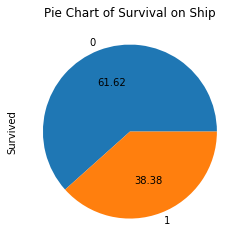

In [252]:
TrainFile["Survived"].value_counts().plot.pie(figsize = (4, 4),
                                        autopct= '%.2f',
                                        fontsize = 10,
                                        title = "Pie Chart of Survival on Ship")

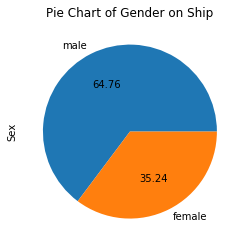

In [253]:
##Plot of female vs male in file
TrainFile["Sex"].value_counts().plot.pie(figsize = (4, 4),
                                        autopct= '%.2f',
                                        fontsize = 10,
                                        title = "Pie Chart of Gender on Ship")

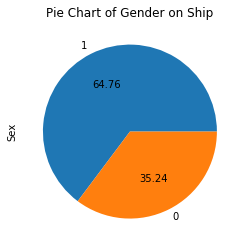

In [270]:
##Plot of female vs male in file changed to 0 for female and 1 for male
TrainFile["Sex"].value_counts().plot.pie(figsize = (4, 4),
                                        autopct= '%.2f',
                                        fontsize = 10,
                                        title = "Pie Chart of Gender on Ship")

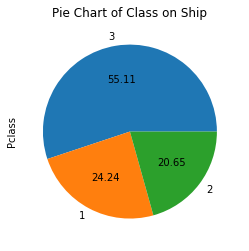

In [254]:
TrainFile["Pclass"].value_counts().plot.pie(figsize = (4, 4),
                                        autopct= '%.2f',
                                        fontsize = 10,
                                        title = "Pie Chart of Class on Ship")

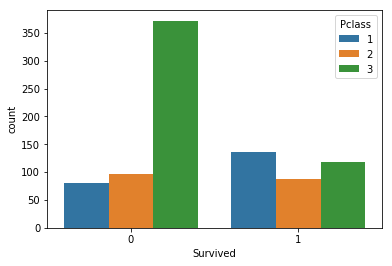

In [255]:
## countplot of survived with class
sns.countplot(x="Survived", hue="Pclass", data=TrainFile)

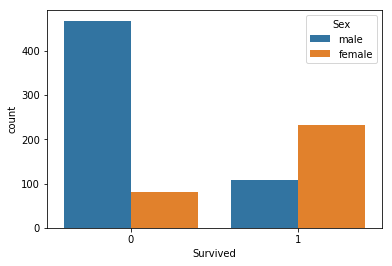

In [256]:
##plot hued with gender
sns.countplot(x="Survived", hue="Sex", data=TrainFile)


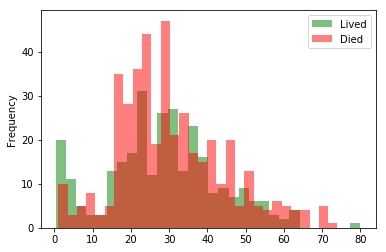

In [257]:
##Looking at the distribution of those who survived and didnt by age.
Lived = TrainFile[TrainFile["Survived"] == 1]
Died = TrainFile[TrainFile["Survived"] == 0]
Lived["Age"].plot.hist(alpha=0.5,color='green',bins=30)
Died["Age"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

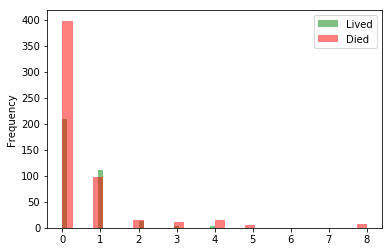

In [258]:
##checking by number of siblings
Lived["SibSp"].plot.hist(alpha=0.5,color='green',bins=30)
Died["SibSp"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

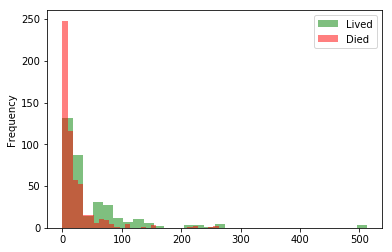

In [259]:
##checking by fare amount
Lived["Fare"].plot.hist(alpha=0.5,color='green',bins=30)
Died["Fare"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

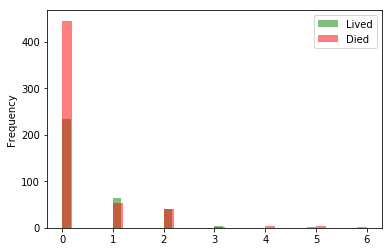

In [260]:
Lived["Parch"].plot.hist(alpha=0.5,color='green',bins=30)
Died["Parch"].plot.hist(alpha=0.5,color='red',bins=30)
plt.legend(['Lived','Died'])
plt.show()

In [261]:
## Data cleaning and looking for nulls.
print('\033[1m'+"Checking if train_df contains any null value:-"+'\033[0m')
print(TrainFile.isnull().sum())
print('\n')
print('\033[1m'+"Checking if test_df contains any null value:-"+'\033[0m')
print(TestFile.isnull().sum())

Checking if train_df contains any null value:-
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Checking if test_df contains any null value:-
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [262]:
##Fill ages with median values to avoild null values in ML
TestFile['Age'].fillna(TestFile['Age'].median(), inplace = True)
TrainFile['Age'].fillna(TrainFile['Age'].median(), inplace = True)

In [263]:
print('\033[1m'+"Checking if train_df contains any null value:-"+'\033[0m')
print(TrainFile.isnull().sum())
print('\n')
print('\033[1m'+"Checking if test_df contains any null value:-"+'\033[0m')
print(TestFile.isnull().sum())

Checking if train_df contains any null value:-
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Checking if test_df contains any null value:-
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [44]:
##Drop the cabin values since most of people might not have been in their cabins at time of wreck anyways
##make file with only id and names incase needed later for identifications.
NewTrainName = pd.DataFrame(data = TrainFile, columns = ["PassengerId", "Name"])
NewTestName = pd.DataFrame(data = TestFile, columns = ["PassengerId", "Name"])
drop_col=["Cabin", "Name"]
TrainFile.drop(drop_col, axis=1, inplace=True)
TestFile.drop(drop_col, axis=1, inplace=True)

In [264]:
TestFile['Fare'].fillna(TestFile['Fare'].median(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda

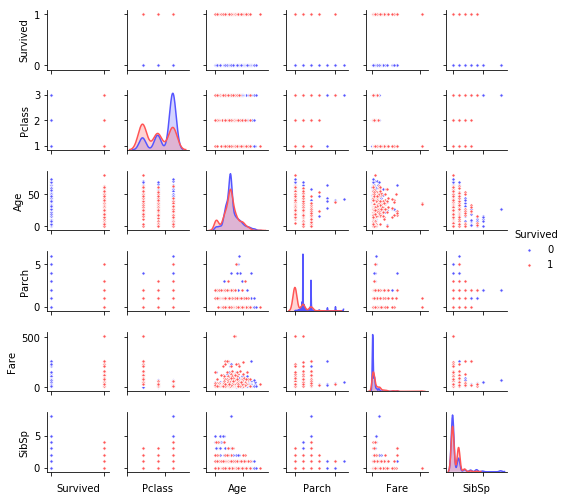

In [265]:
g = sns.pairplot(TrainFile[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare', u'Embarked',
       u'SibSp']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

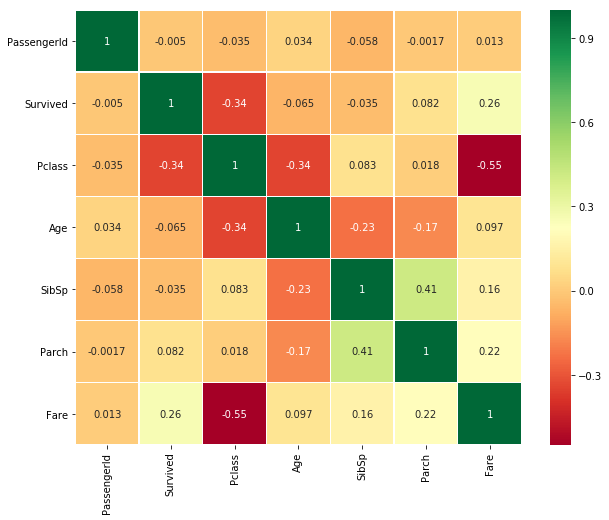

In [266]:
sns.heatmap(TrainFile.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [267]:
print('Highest Age:',TrainFile['Age'].max(),'   Lowest Age:',TrainFile['Age'].min())

Highest Age: 80.0    Lowest Age: 0.42


In [268]:
## start cross validation
from sklearn.model_selection import train_test_split #split the dat in test and train sets
from sklearn.model_selection import cross_val_score #score evaluation with cross validation
from sklearn.model_selection import cross_val_predict #prediction with cross validation
from sklearn.metrics import confusion_matrix #for confusion matrix (metric of succes)
from sklearn.model_selection import KFold #for K-fold cross validation
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

In [269]:
##change some categories
from sklearn.preprocessing import LabelEncoder
num = LabelEncoder()
TrainFile["Sex"] = num.fit_transform(TrainFile["Sex"].astype("str"))
TestFile["Sex"] = num.fit_transform(TestFile["Sex"].astype("str"))
TrainFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [148]:
#feature selections
feature_cols = ["Age", "Sex","Pclass", "SibSp"]
X = TrainFile[feature_cols]
y = TrainFile.Survived

In [121]:
kf = KFold( n_splits = 10, shuffle = False)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [150]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8059701492537313

In [151]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7985074626865671

In [157]:
all_features = TrainFile.drop("Survived",axis=1)
targeted_feature = TrainFile["Survived"]

In [198]:
features1 = TrainFile["Age"]
features2 = TrainFile["Sex"]
features3 = TrainFile["SibSp"]

In [195]:
X_trains1,X_tests1,y_trains1,y_tests1 = train_test_split(features1,
                                                 targeted_feature,
                                                 test_size=0.3,random_state=42)

In [271]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [272]:
TrainFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [273]:
TestFile.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [274]:
## reading about how it sank, it got hit at the 
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

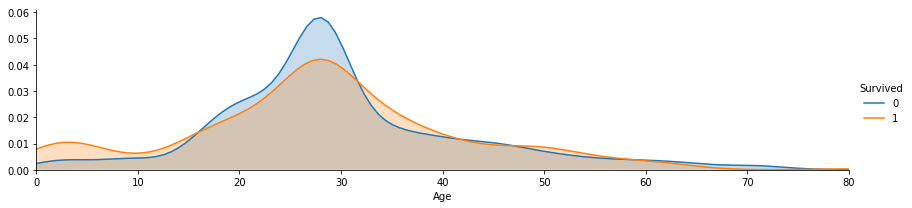

In [275]:

facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, TrainFile['Age'].max()))
facet.add_legend()
 
plt.show()

In [276]:
full_data = [TrainFile, TestFile]

In [218]:
#Group Age to make it easier for classification since it looks like there is a clear delineation between the ages and what it does.

for dataset in full_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

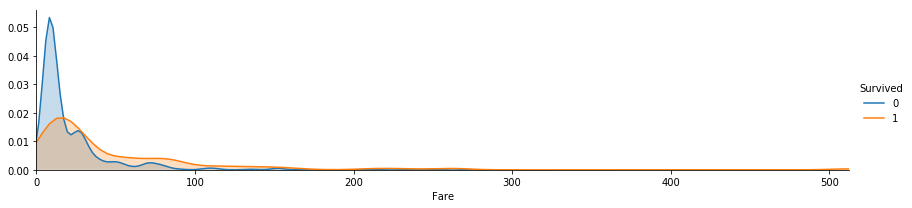

In [277]:
facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, TrainFile['Fare'].max()))
facet.add_legend()
plt.show()

(0, 200)

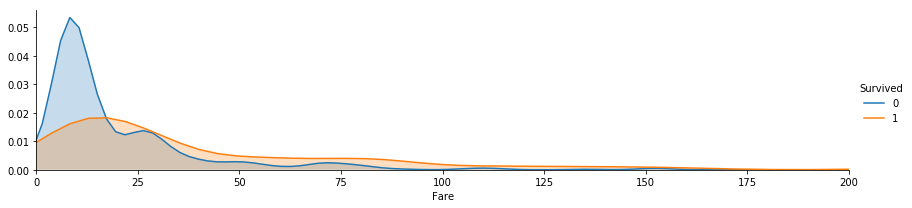

In [278]:
facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, TrainFile['Fare'].max()))
facet.add_legend()
plt.xlim(0, 200)

(0, 20)

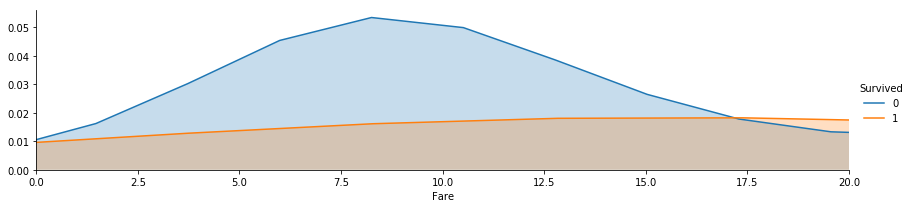

In [279]:
facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, TrainFile['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [280]:
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <= 160), 'Fare'] = 3,
    dataset.loc[ dataset['Fare'] > 160, 'Fare'] = 4

In [281]:
##Make family size from parents and siblings data
TrainFile["FamilySize"] = TrainFile["SibSp"] + TrainFile["Parch"] + 1
TestFile["FamilySize"] = TestFile["SibSp"] + TestFile["Parch"] + 1

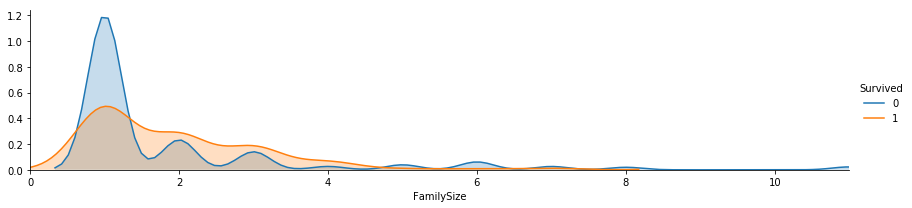

In [282]:

facet = sns.FacetGrid(TrainFile, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, TrainFile['FamilySize'].max()))
facet.add_legend()
plt.show()

In [283]:
family = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in full_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family)

In [284]:
TrainFile["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [285]:

for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [286]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [287]:
TrainFile.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.0,NaN,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,2.0,C85,1,0.4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,2.0,C123,0,0.4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.0,NaN,0,0.0


In [288]:
TrainFile.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
F2                 3
C22 C26            3
D                  3
F33                3
E101               3
B5                 2
C65                2
C78                2
C2                 2
E25                2
C52                2
C68                2
B20                2
C125               2
E67                2
D36                2
F G73              2
B28                2
E121               2
B49                2
C83                2
C126               2
D17                2
B57 B59 B63 B66    2
B58 B60            2
E33                2
E24                2
                  ..
B80                1
D28                1
D30                1
D15                1
D47                1
E63                1
B3                 1
E40                1
C30                1
C70                1
D46                1
C110               1
C82                1
C47                1
D11                1
C99                1
C86          

In [289]:
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [290]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in full_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [291]:
TestFile['Cabin'].fillna(TestFile['Cabin'].median(), inplace = True)
TrainFile['Cabin'].fillna(TrainFile['Cabin'].median(), inplace = True)

In [293]:
features_to_drop = ['Ticket', 'Name', 'SibSp', 'Parch']
train = TrainFile.drop(features_to_drop, axis=1)
test = TestFile.drop(features_to_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [294]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,1,22.0,0.0,0.8,0,0.4
1,1,0,38.0,2.0,0.8,1,0.4
2,3,0,26.0,0.0,0.8,0,0.0
3,1,0,35.0,2.0,0.8,0,0.4
4,3,1,35.0,0.0,0.8,0,0.0


In [295]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [296]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 52.3 KB


In [297]:
#KNN
clf = KNeighborsClassifier(n_neighbors = 13)
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy")
print(score)

[0.74444444 0.78651685 0.74157303 0.6741573  0.78651685 0.7752809
 0.74157303 0.78651685 0.71910112 0.7752809 ]


In [300]:
# kNN Score
round(np.mean(score)*100, 2)

75.31

In [301]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy")
print(score)

[0.74444444 0.82022472 0.75280899 0.7752809  0.85393258 0.78651685
 0.79775281 0.76404494 0.7752809  0.79775281]


In [302]:
# decision tree Score
round(np.mean(score)*100, 2)

78.68

In [303]:
clf = GaussianNB()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy")
print(score)

[0.84444444 0.78651685 0.7752809  0.69662921 0.71910112 0.7752809
 0.74157303 0.82022472 0.82022472 0.83146067]


In [304]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.11

In [307]:
clf = SVC()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring="accuracy")
print(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[0.76666667 0.82022472 0.7752809  0.74157303 0.83146067 0.84269663
 0.82022472 0.82022472 0.82022472 0.79775281]


In [308]:
#svm
round(np.mean(score)*100,2)

80.36

In [309]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [310]:

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [311]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [312]:
submission.iloc[894]

IndexError: single positional indexer is out-of-bounds